In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
!pip install pydotplus

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [8]:
import pydotplus

In [5]:
import pandas as pd

In [6]:
iris = pd.read_csv("iris.data", header=None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris = pd.read_csv("iris.data")
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [8]:
iris = pd.read_csv("iris.data", header=None,names=["x1","x2","x3","x4","y"])
iris.head()

,x1,x2,x3,x4,y
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris.y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
def iris_type(s):
    it = {'Iris-setosa': 0,
          'Iris-versicolor': 1,
          'Iris-virginica': 2}
    return it[s]

iris = pd.read_csv("iris.data", header=None,converters={4:iris_type})
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
from sklearn import preprocessing
iris=pd.read_csv("iris.data", header=None,names=["x1","x2","x3","x4","y"])
x=iris.values[:,:-1]
y=iris.values[:,-1]
le=preprocessing.LabelEncoder()
le.fit(iris.y.unique())
print le.classes_

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [12]:
y=le.transform(y)
print y[:5]

[0 0 0 0 0]


数据的读取

In [2]:
def iris_type(s):
    it = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    return it[s]


# 花萼长度、花萼宽度，花瓣长度，花瓣宽度
iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'


mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

path = '..\\10.Regression\\10.iris.data'  # 数据文件路径
data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: iris_type})
x, y = np.split(data, [4], axis=1)

In [3]:
print type(x),type(y)
print x.shape,y.shape

<type 'numpy.ndarray'> <type 'numpy.ndarray'>
(150L, 4L) (150L, 1L)


In [4]:
# 为了可视化，仅使用前两列特征
x = x[:, :2]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105L, 2L), (45L, 2L), (105L, 1L), (45L, 1L))

In [5]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=6)
model = model.fit(x_train, y_train)
y_test_hat = model.predict(x_test)  

with open('iris.dot', 'w') as f:
    tree.export_graphviz(model, out_file=f)
#this graph is not colorful and feature,class name is not shown.

#method 2
tree.export_graphviz(model, out_file='iris.dot')

In [6]:
dot_data = tree.export_graphviz(model, out_file="iris2.dot",feature_names=iris_feature_E, class_names=iris_class,
                                filled=True, rounded=True, special_characters=True)

In [36]:
!dot -Tpng iris2.dot -o tree2.png

ERROR:root:Cell magic `%%dot` not found.


In [38]:
print tree.export_graphviz(model, out_file=None,feature_names=iris_feature_E, class_names=iris_class,
                                filled=True, rounded=True, special_characters=True)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<sepal length &le; 5.55<br/>entropy = 1.5802<br/>samples = 105<br/>value = [31, 37, 37]<br/>class = Iris-versicolor>, fillcolor="#39e58100"] ;
1 [label=<sepal width &le; 2.8<br/>entropy = 0.9814<br/>samples = 42<br/>value = [30, 11, 1]<br/>class = Iris-setosa>, fillcolor="#e581399c"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<sepal length &le; 4.95<br/>entropy = 0.8167<br/>samples = 12<br/>value = [1, 10, 1]<br/>class = Iris-versicolor>, fillcolor="#39e581d1"] ;
1 -> 2 ;
3 [label=<sepal width &le; 2.35<br/>entropy = 1.585<br/>samples = 3<br/>value = [1, 1, 1]<br/>class = Iris-setosa>, fillcolor="#e5813900"] ;
2 -> 3 ;
4 [label=<entropy = 0.0<br/>samples = 1<br/>value = [1, 0, 0]<br/>class = Iris-setosa>, fillcolor="#e58139ff"] ;
3 -> 4 ;
5 [label=<sepal width &le; 2.45<br/>entropy = 1.0<br/>samples = 2<br/>value = [0, 1, 1]<br

In [12]:
dot_data = tree.export_graphviz(model, out_file=None,feature_names=iris_feature_E, class_names=iris_class,
                                filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('iris.pdf')
f = open('iris.png', 'wb')
f.write(graph.create_png())
f.close()

In [42]:
# 画图
N, M = 50, 50  # 横纵各采样多少个值
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
print x_show.shape
print type(x_show)

(2500L, 2L)
<type 'numpy.ndarray'>


In [43]:
print model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [45]:
# # 无意义，只是为了凑另外两个维度
# # 打开该注释前，确保注释掉x = x[:, :2]
# x3 = np.ones(x1.size) * np.average(x[:, 2])
# x4 = np.ones(x1.size) * np.average(x[:, 3])
# x_test = np.stack((x1.flat, x2.flat, x3, x4), axis=1)  # 测试点

cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_show_hat = model.predict(x_show)  # 预测值
print y_show_hat.shape
print y_show_hat
y_show_hat = y_show_hat.reshape(x1.shape)  # 使之与输入的形状相同
print y_show_hat

(2500L,)
[ 0.  0.  0. ...,  2.  2.  2.]
[[ 0.  0.  0. ...,  2.  2.  2.]
 [ 0.  0.  0. ...,  2.  2.  2.]
 [ 0.  0.  0. ...,  2.  2.  2.]
 ..., 
 [ 0.  0.  0. ...,  2.  2.  2.]
 [ 0.  0.  0. ...,  2.  2.  2.]
 [ 0.  0.  0. ...,  2.  2.  2.]]


In [46]:
print y_test
print y_test.ravel()

[[ 1.]
 [ 0.]
 [ 2.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 1.]
 [ 1.]
 [ 2.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 1.]
 [ 1.]
 [ 2.]
 [ 0.]
 [ 2.]
 [ 0.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 2.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]]
[ 1.  0.  2.  1.  1.  0.  1.  2.  1.  1.  2.  0.  0.  0.  0.  1.  2.  1.
  1.  2.  0.  2.  0.  2.  2.  2.  2.  2.  0.  0.  0.  0.  1.  0.  0.  2.
  1.  0.  0.  0.  2.  1.  1.  0.  0.]


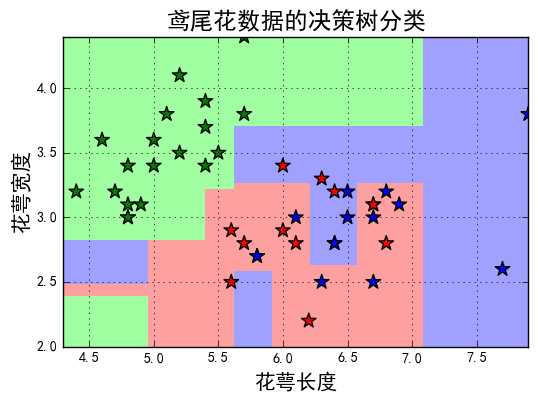

In [47]:
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)  # 预测值的显示
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test.ravel(), edgecolors='k', s=120, cmap=cm_dark, marker='*')  # 测试数据
#plt.scatter(x[:, 0], x[:, 1], c=y.ravel(), edgecolors='k', s=40, cmap=cm_dark)  # 全部数据
plt.xlabel(iris_feature[0], fontsize=15)
plt.ylabel(iris_feature[1], fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)
plt.title(u'鸢尾花数据的决策树分类', fontsize=17)
plt.show()

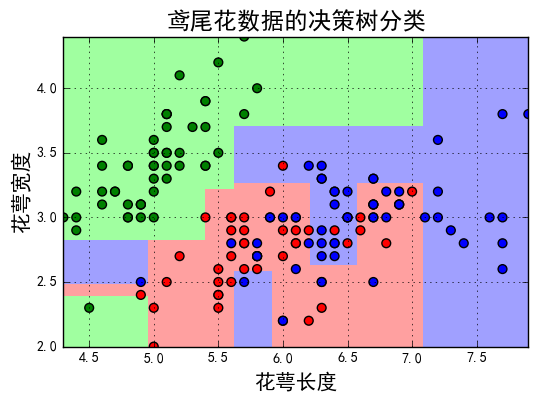

In [48]:
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)  # 预测值的显示
plt.scatter(x[:, 0], x[:, 1], c=y.ravel(), edgecolors='k', s=40, cmap=cm_dark)  # 全部数据
plt.xlabel(iris_feature[0], fontsize=15)
plt.ylabel(iris_feature[1], fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)
plt.title(u'鸢尾花数据的决策树分类', fontsize=17)
plt.show()

In [16]:
import pandas as pd
df=pd.read_csv("iris.data",header=None,names=['sepal length', 'sepal width', 'petal length', 'petal width','species'])

In [17]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(df.species.unique())
df.species=le.transform(df.species)
print df[:5]

   sepal length  sepal width  petal length  petal width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [18]:
x1=df["sepal length"]
x2=df["sepal width"]
x=df[["sepal length","sepal width"]]
y=df["species"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
clf=DecisionTreeClassifier(criterion="gini",random_state=1)

In [19]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [24]:
x1min,x1max=x1.min(),x1.max()
x2min,x2max=x2.min(),x2.max()
x1=np.linspace(x1min,x1max,50)
x2=np.linspace(x2min,x2max,60)
x11,x22=np.meshgrid(x1,x2)
print x11.shape,x22.shape

(60L, 50L) (60L, 50L)


In [25]:
t1,t2=np.meshgrid(np.array([1,2]),np.array([3,4,5]))
print t1
print t2
np.stack((t1.ravel(),t2.ravel()),axis=1)

[[1 2]
 [1 2]
 [1 2]]
[[3 3]
 [4 4]
 [5 5]]


array([[1, 3],
       [2, 3],
       [1, 4],
       [2, 4],
       [1, 5],
       [2, 5]])

In [34]:
y_predic=clf.predict(np.stack((x11.ravel(),x22.ravel()),axis=1))
type(a),a.shape

(numpy.ndarray, (3000L,))

In [35]:
y=y_predic.reshape(x11.shape)

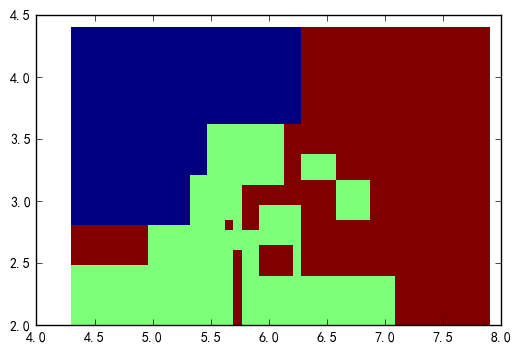

In [44]:
plt.figure(facecolor="w",edgecolor="r")
plt.pcolormesh(x11,x22,y)
plt.show()

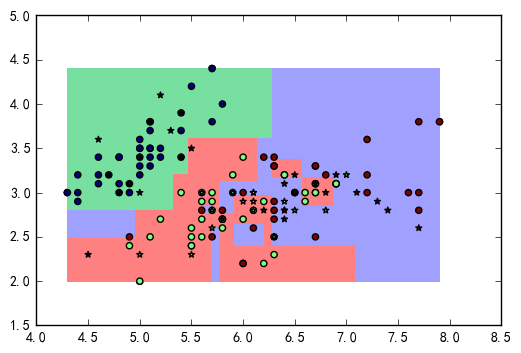

In [55]:
cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.pcolormesh(x11,x22,y,cmap=cm_light)
plt.scatter(x_train['sepal length'],x_train['sepal width'],c=y_train,marker="o")
plt.scatter(x_test['sepal length'],x_test['sepal width'],c=y_test,marker="*")
plt.show()

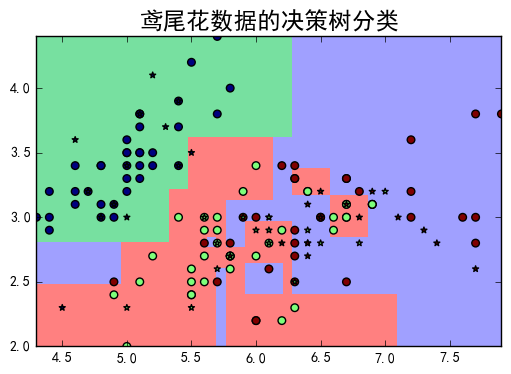

In [61]:
cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.pcolormesh(x11,x22,y,cmap=cm_light)
plt.scatter(x_train['sepal length'],x_train['sepal width'],s=30,edgecolors="k",c=y_train,marker="o")
plt.scatter(x_test['sepal length'],x_test['sepal width'],c=y_test,marker="*")
plt.xlim(x1min,x1max)
plt.ylim(x2min,x2max)
plt.title(u'鸢尾花数据的决策树分类', fontsize=17)
plt.show()

In [62]:
# 训练集上的预测结果
y_test = y_test.reshape(-1)
print y_test_hat
print y_test
result = (y_test_hat == y_test)   # True则预测正确，False则预测错误
acc = np.mean(result)
print '准确度: %.2f%%' % (100 * acc)

[ 1.  0.  2.  1.  1.  0.  1.  1.  1.  1.  2.  0.  0.  0.  0.  2.  2.  2.
  1.  2.  0.  1.  0.  2.  2.  1.  1.  1.  0.  0.  0.  0.  1.  0.  0.  1.
  2.  0.  0.  0.  1.  2.  1.  0.  0.]
[0 2 1 2 1 2 0 2 1 0 0 0 1 1 2 1 0 0 2 1 2 0 0 2 1 1 2 1 2 0 0 1 2 2 2 2 2
 2 0 0 1 0 1 1 1]
准确度: 31.11%


1  错误率: 35.56%
2  错误率: 35.56%
3  错误率: 22.22%
4  错误率: 22.22%
5  错误率: 22.22%
6  错误率: 24.44%
7  错误率: 28.89%
8  错误率: 31.11%
9  错误率: 33.33%
10  错误率: 33.33%
11  错误率: 33.33%
12  错误率: 33.33%
13  错误率: 33.33%
14  错误率: 33.33%


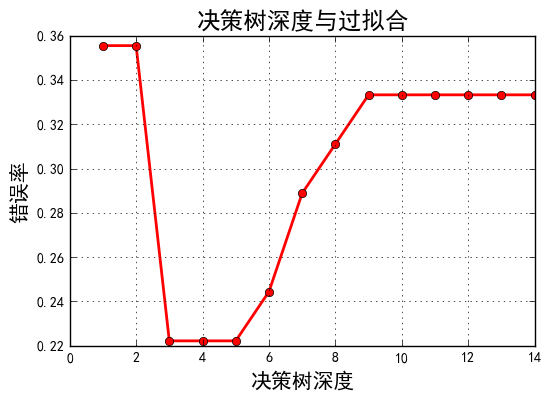

In [63]:
# 过拟合：错误率
depth = np.arange(1, 15)
err_list = []
for d in depth:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf = clf.fit(x_train, y_train)
    y_test_hat = clf.predict(x_test)  # 测试数据
    result = (y_test_hat == y_test)  # True则预测正确，False则预测错误
    err = 1 - np.mean(result)
    err_list.append(err)
    # print d, ' 准确度: %.2f%%' % (100 * err)
    print d, ' 错误率: %.2f%%' % (100 * err)
plt.figure(facecolor='w')
plt.plot(depth, err_list, 'ro-', lw=2)
plt.xlabel(u'决策树深度', fontsize=15)
plt.ylabel(u'错误率', fontsize=15)
plt.title(u'决策树深度与过拟合', fontsize=17)
plt.grid(True)
plt.show()

1  错误率: 35.56%
2  错误率: 35.56%
3  错误率: 22.22%
4  错误率: 22.22%
5  错误率: 22.22%
6  错误率: 24.44%
7  错误率: 28.89%
8  错误率: 31.11%
9  错误率: 33.33%
10  错误率: 33.33%
11  错误率: 33.33%
12  错误率: 33.33%
13  错误率: 33.33%
14  错误率: 33.33%


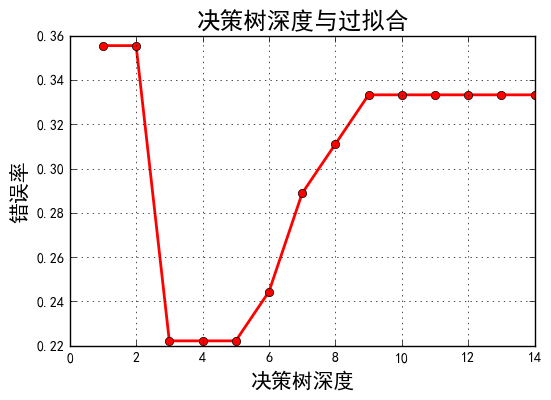

In [64]:
# 过拟合：错误率
depth = np.arange(1, 15)
err_list = []
for d in depth:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf = clf.fit(x_train, y_train)
    y_test_hat = clf.predict(x_test)  # 测试数据
    result = (y_test_hat == y_test)  # True则预测正确，False则预测错误
    err = 1 - np.mean(result)
    err_list.append(err)
    # print d, ' 准确度: %.2f%%' % (100 * err)
    print d, ' 错误率: %.2f%%' % (100 * err)
#plt.figure(facecolor='w')
plt.plot(depth, err_list, 'ro-', lw=2)
plt.xlabel(u'决策树深度', fontsize=15)
plt.ylabel(u'错误率', fontsize=15)
plt.title(u'决策树深度与过拟合', fontsize=17)
plt.grid(True)
plt.show()